In [1]:
import struct
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

dpi=100

In [3]:
filename = input("Enter the data file name (ext = .dat): ")+".dat";
print()

Enter the data file name (ext = .dat):  run001


In [4]:
filename = "run001.dat"

In [5]:
def header(file):
    struct.unpack('i',file.read(4))
    
def unpack_float(file, dims=(1)):
    if dims==(1):
        return struct.unpack('d',file.read(8))[0]
    else:
        dtype = np.dtype(np.float64)
        dtype = dtype.newbyteorder('<')
        return np.frombuffer(file.read(8*np.product(dims))).reshape(dims)

def unpack_int(file):
    return struct.unpack('i',file.read(4))[0]

class channel():
    pass
    
with open(filename, mode="rb") as file:
    header(file)
    channel.nout = unpack_int(file)
    channel.tend = unpack_float(file)
    header(file)
    header(file)
    channel.mx = unpack_int(file)
    channel.my = unpack_int(file)
    channel.meqn = unpack_int(file)
    channel.mbc = unpack_int(file)
    header(file)
    header(file)
    channel.dt = unpack_float(file)
    channel.dx = unpack_float(file)
    channel.dy = unpack_float(file)
    gamma = unpack_float(file)
    channel.cf = unpack_float(file)
    channel.cb = unpack_float(file)
    header(file)
    header(file)
    channel.ixbc = unpack_int(file)
    channel.iybc = unpack_int(file)
    header(file)
    header(file)
    channel.x = unpack_float(file, dims=(channel.mx,1))
    header(file)
    header(file)
    channel.y = unpack_float(file, dims=(channel.my,1))
    header(file)
    header(file)
    channel.b = unpack_float(file, dims=(channel.my,channel.mx))
    header(file)
    header(file)
    channel.cbxy = unpack_float(file, dims=(channel.my,channel.mx))
    header(file)
    
    channel.t = np.zeros((channel.nout))
    channel.h = np.zeros((channel.nout, channel.my, channel.mx))
    channel.qu = np.zeros((channel.nout, channel.my, channel.mx))
    channel.qv = np.zeros((channel.nout, channel.my, channel.mx))
    
    for i in range(channel.nout):
        header(file)
        channel.t[i] = unpack_float(file)
        header(file)
        header(file)
        channel.h[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
        header(file)
        header(file)
        channel.qu[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
        header(file)
        header(file)
        channel.qv[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
        header(file)
    
    channel.x = channel.x[:,0][np.newaxis,:]
    channel.y = channel.y[:,0][:,np.newaxis]
    
    channel.u = channel.qu/channel.h
    channel.v = channel.qv/channel.h
    channel.u[channel.h < 0.001] = 0.
    channel.v[channel.h < 0.001] = 0.
    channel.qu[channel.h < 0.001] = 0.
    channel.qv[channel.h < 0.001] = 0.
    channel.h[channel.h < 0.001] = 0.
    channel.eta = channel.h + channel.b
    

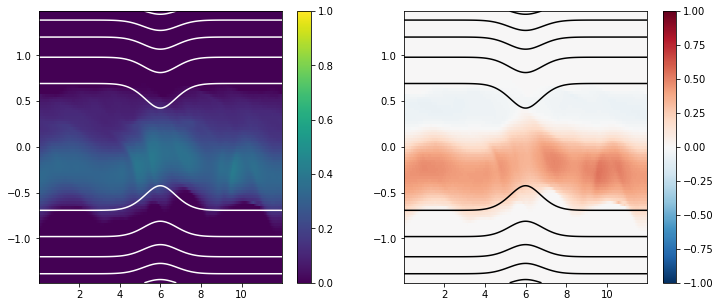

In [7]:
i = -1
plt.figure(1,figsize=(12,5))
plt.clf()
plt.subplot(1,2,1)
q = plt.pcolor(channel.x,channel.y,channel.h[i,:,:])
plt.contour(channel.x.squeeze(),channel.y.squeeze(),channel.b,5,colors="w")
plt.colorbar(q)
q.set_clim([0,1.0])

plt.subplot(1,2,2)
q = plt.pcolor(channel.x,channel.y,channel.qu[i,:,:],cmap=plt.get_cmap("RdBu_r"))
plt.contour(channel.x.squeeze(),channel.y.squeeze(),channel.b,5,colors="k")
plt.colorbar(q)
q.set_clim([-1.0,1.0])

(-0.1, 2.0)

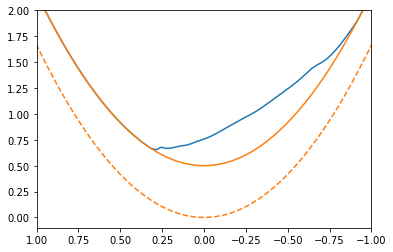

In [44]:
plt.plot(channel.y,channel.h[i,:,300]+channel.b[:,300],"C0-")
plt.plot(channel.y,channel.b[:,300],"C1-")
#plt.plot(channel.y,channel.h[i,:,0]+channel.b[:,0],"C0--")
plt.plot(channel.y,channel.b[:,0],"C1--")
plt.xlim([1.,-1.])
plt.ylim([-0.1,2.0])

In [ ]:
for i in range(channel.nout):
    print(i,end=", ")
    plt.figure(1,figsize=(8,10))
    plt.clf()
    plt.subplot(3,1,1)
    q = plt.pcolor(channel.x,-channel.y,channel.h[i,:,:])
    plt.contour(channel.x.squeeze(),-channel.y.squeeze(),channel.b,7,colors="w")
    plt.colorbar(q,label="layer thickness")
    plt.ylabel("x")
    plt.ylim([1.,-1.])
    plt.xlabel("y")
    q.set_clim([0,0.8])

    plt.subplot(3,1,2)
    q = plt.pcolor(channel.x,-channel.y,channel.qu[i,:,:],cmap=plt.get_cmap("RdBu_r"))
    plt.contour(channel.x.squeeze(),-channel.y.squeeze(),channel.b,7,colors="k")
    plt.colorbar(q,label="layer transport")
    plt.ylabel("x")
    plt.ylim([1.,-1.])
    plt.xlabel("y")
    q.set_clim([-1.0,1.0])
    
    plt.subplot(3,1,3)
    plt.plot(-channel.y,channel.h[i,:,300]+channel.b[:,300],"C0-")
    plt.plot(-channel.y,channel.b[:,300],"C1-")
    plt.plot(-channel.y,channel.b[:,0],"C1--")
    plt.xlim([-1.,1.])
    plt.ylim([-0.1,2.0])
    plt.xlabel("x")
    
    plt.savefig("figures_"+filename.split(".")[0]+"/"+str(i).zfill(4)+'.png',dpi=dpi,bbox_inches="tight")
    

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 